In [46]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import numpy as np

## Computer Vision Intro

There are multiple libraries on Computer Vision with Python. The more used are: OpenCV, PIL, Scikit-image.

We are going to explore a bit of OpenCV.

### Uploading the Image

In [47]:
img = cv.imread('fruit.jpeg')

## img has been saved as numpy array. Notice the shape. What is the number 3 for?
img.shape 

(168, 300, 3)

In [48]:
### Can you find out what color is the pixel (78, 120)?

### Displaying the Image

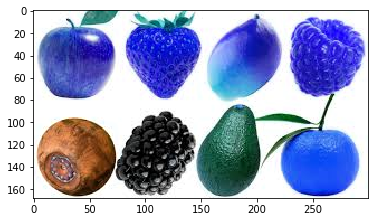

In [49]:
## Using the plt library
plt.imshow(img)    

## How can I get a "normal colored" image with plt?

In [50]:
cv.imshow('image', img)

## Where is the image?? 
cv.waitKey(10000)
cv.destroyAllWindows()
for i in range (1,5):
    cv.waitKey(1)

### Image Stats

In [51]:
import collections

img_b = list(img[:,:,0].reshape(1,-1)[0])
img_g = list(img[:,:,1].reshape(1,-1)[0])
img_r = list(img[:,:,2].reshape(1,-1)[0])

tuple_list=[(r,g,b) for r,g,b in zip(img_r, img_b, img_b)]
#set_col = set(tpl_col)

counter=collections.Counter(tuple_list)
sort_counter =sorted(counter.items(), key=lambda x:x[1], reverse = True)
sort_counter[0]

((255, 255, 255), 8698)

### Split the colors

In [52]:
b,g,r = cv.split(img)

In [53]:
## Visualize only one of the colors and see what it looks like

### Gray Images Stats

In [54]:
## What are the most common values per channel (each color of the image) ? 

### Image Augmentation

In [55]:
flipped_img = cv.flip(img, 0)  # 0 = vertical, 1 = horizontal, -1 = both

In [56]:
## Diplay to see the result

### Smoothing Images

In [57]:
blur = cv.GaussianBlur(img,(5,5),2)  ## Check the documentation and change the values to see the differences

## Edge Detection

In [58]:
edges = cv.Canny(blur,100,200)

## What does it do? 

## Image Segmentation

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html

In [59]:
## Turn image to gray
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 

## Select a threshold
ret, thresh_img = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

thresh_img.shape

(168, 300)

In [60]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pxl_img = img.reshape((-1, 3))

# convert to float
fl_pxl_img = np.float32(pxl_img)

In [61]:
# define stopping criteria
#criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
criteria = (cv.TERM_CRITERIA_EPS, 100, 0.9)

In [62]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv.kmeans(fl_pxl_img, k, None, criteria, 30, cv.KMEANS_RANDOM_CENTERS)

## What values are in labels

In [63]:
# convert back to 8 bit values
centers = np.uint8(centers)

# convert all pixels to the color of the centroids
segmented_img = centers[labels.flatten()]

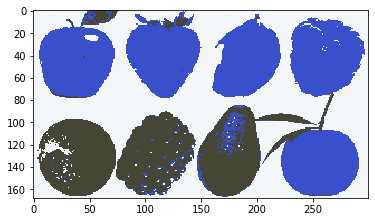

In [64]:
# reshape back to the original image dimension
segmented_img = segmented_img.reshape(img.shape)

# show the image
plt.imshow(segmented_img)
plt.show()

In [65]:
## Other super famous option that you can try: Watershed

## Face recognition 

Import image and show it

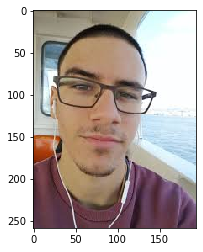

In [77]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default copy.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye copy.xml')

image = cv.imread('images.jpeg')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

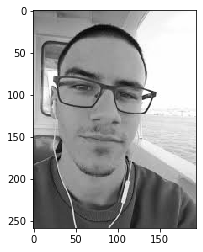

In [78]:
plt.imshow(img_grey, cmap = 'gray')

In [79]:
img_color = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img_grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(img_grey,\
                                      scaleFactor=1.1,\
                                      minNeighbors=5,\
                                      minSize=(20, 20),\
                                      flags = cv.CASCADE_SCALE_IMAGE)
print("Found {0} faces!".format(len(faces)))

Found 1 faces!


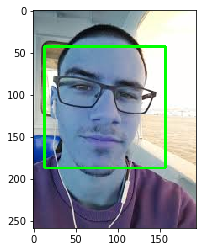

In [81]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    face_detect = cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(face_detect)


## From Image to Video

In [83]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    
    #Detect faces in the image
    faces = face_cascade.detectMultiScale(gray,\
                                      scaleFactor=1.1,\
                                      minNeighbors=5,\
                                      minSize=(20, 20),\
                                      flags = cv2.CASCADE_SCALE_IMAGE)
    
    for (x, y, w, h) in faces:
        face_detect = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('frame',face_detect)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 